In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pickle
from pathlib import Path

In [7]:
TEST = Path('../bert/exp/attns/test')
n_classes = 2
plt.rcParams['font.family'] = 'arial'

In [8]:
def plot_auroc(path: Path, nclass=2):
    with open(path / 'labels.pkl', 'rb') as f:
        labels = pickle.load(f)
    with open(path / 'logits.pkl', 'rb') as f:
        logits = pickle.load(f)

    new_labels = []
    for label in labels:
        if label == 0:
            new_labels.append([1,0])
        else:
            new_labels.append([0,1])
    
    y_test = np.array(new_labels)
    y_score = logits.cpu().numpy()
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    lw = 2
    plt.figure(dpi=600)
    plt.plot(
        fpr[n_classes-1],
        tpr[n_classes-1],
        lw=lw,
        color="tab:orange",
        label="ROC curve (area = %0.2f)" % roc_auc[n_classes-1]
    )
    plt.plot([0, 1], [0, 1], color="tab:blue",lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

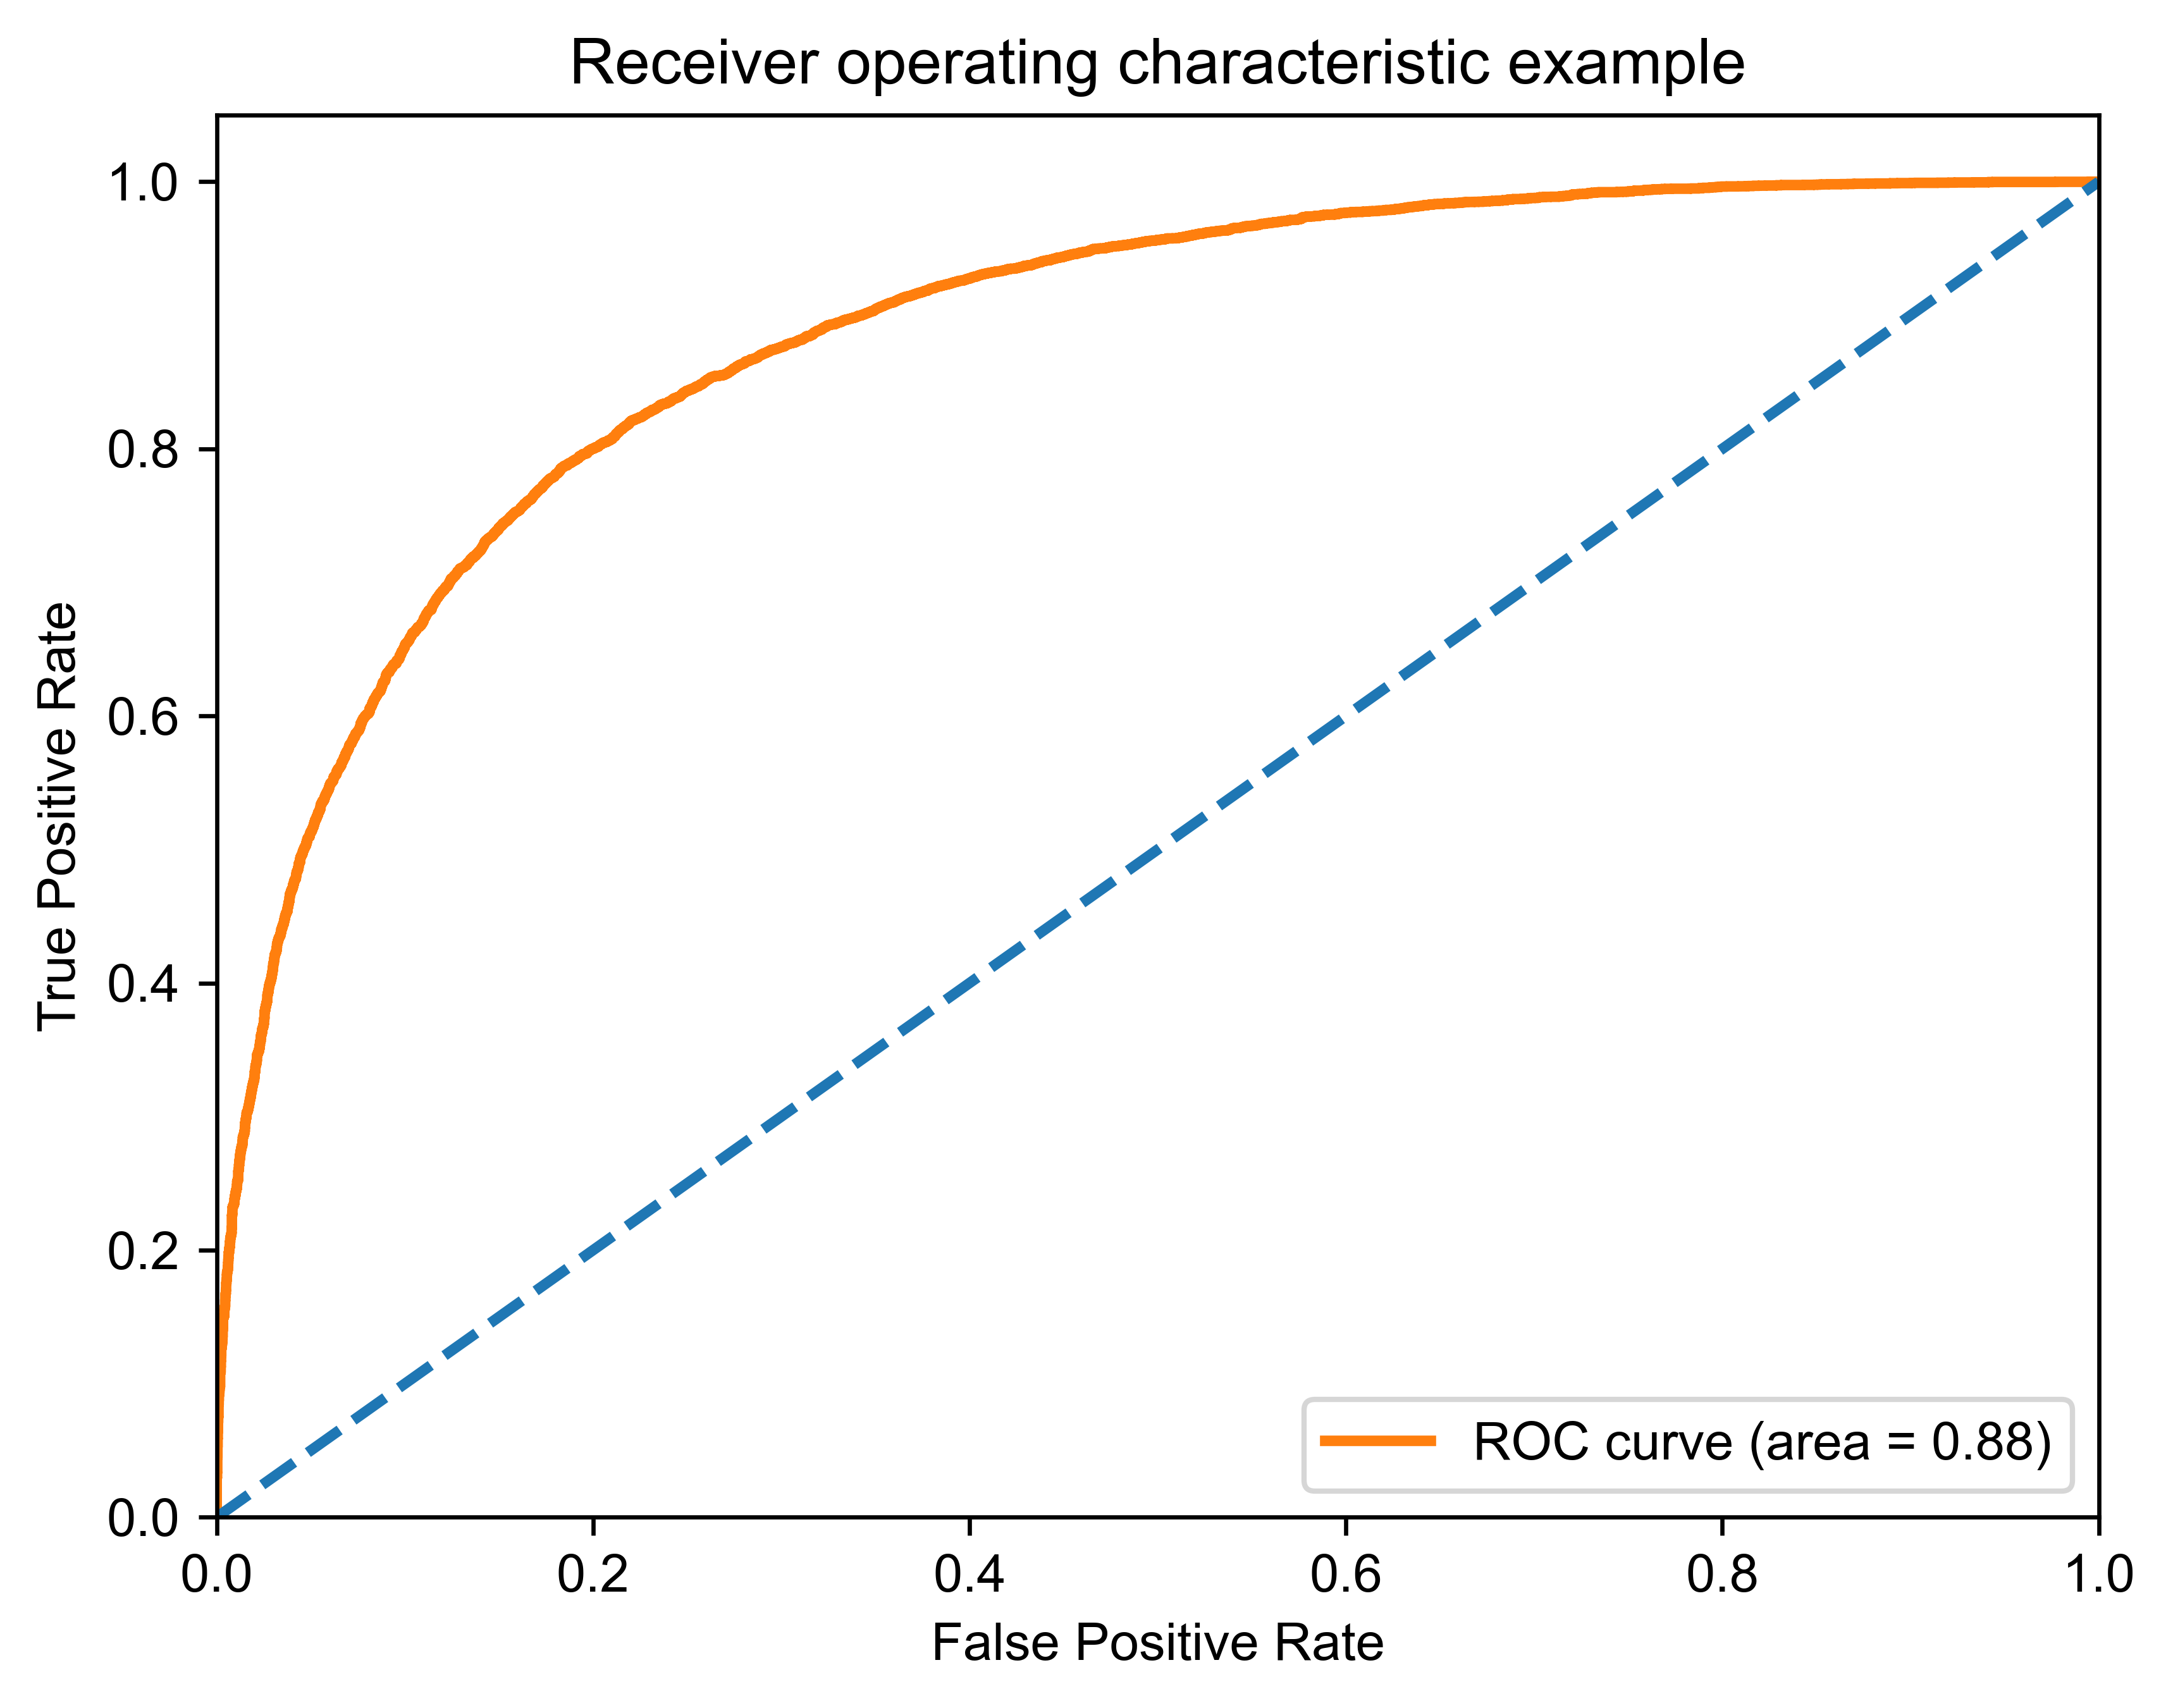

In [9]:
plot_auroc(TEST)